## Import Basic Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Read the CSV File

In [2]:
df = pd.read_csv('TCS.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [3]:
df.shape

(3974, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3974 non-null   object 
 1   Symbol              3974 non-null   object 
 2   Series              3974 non-null   object 
 3   Prev Close          3974 non-null   float64
 4   Open                3974 non-null   float64
 5   High                3974 non-null   float64
 6   Low                 3974 non-null   float64
 7   Last                3974 non-null   float64
 8   Close               3974 non-null   float64
 9   VWAP                3974 non-null   float64
 10  Volume              3974 non-null   int64  
 11  Turnover            3974 non-null   float64
 12  Trades              2291 non-null   float64
 13  Deliverable Volume  3974 non-null   int64  
 14  %Deliverble         3974 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 465.8

In [7]:
print(df.Date.min())
print(df.Date.max())

2004-08-25
2020-08-31


#### values spread across 16 years from 2004-2020

### VWAP

### Plot VWAP

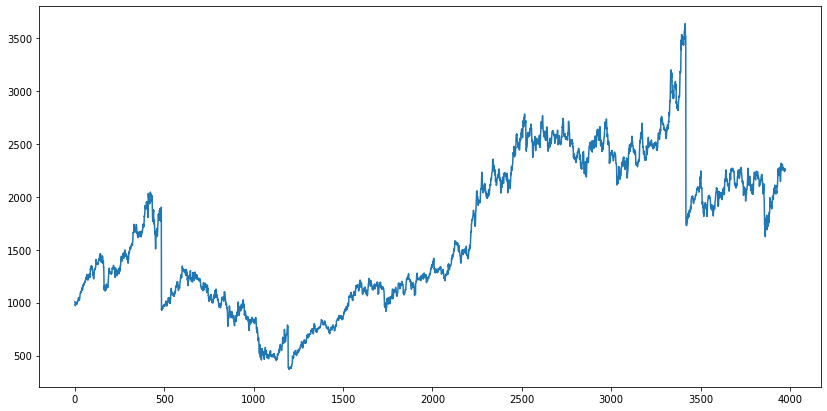

In [9]:
df.VWAP.plot(figsize=(14, 7))

### Create a New Dataframe with selected columns

In [10]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [14]:
data = df[['Date', 'Open', 'Close','High','Low', 'VWAP','Volume']]
data.head()

,Date,Open,Close,High,Low,VWAP,Volume
0,2004-08-25,1198.7,987.95,1198.7,979.00,1008.32,17116372
1,2004-08-26,992.0,979.00,997.0,975.30,985.65,5055400
2,2004-08-27,982.4,962.65,982.4,958.55,969.94,3830750
3,2004-08-30,969.9,986.75,990.0,965.00,982.65,3058151
4,2004-08-31,986.5,988.10,990.0,976.00,982.18,2649332


### Convert Date to Index

In [16]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data.set_index('Date', inplace=True)
data.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,Close,High,Low,VWAP,Volume
Date,,,,,,
2004-08-25,1198.7,987.95,1198.7,979.00,1008.32,17116372
2004-08-26,992.0,979.00,997.0,975.30,985.65,5055400
2004-08-27,982.4,962.65,982.4,958.55,969.94,3830750
2004-08-30,969.9,986.75,990.0,965.00,982.65,3058151
2004-08-31,986.5,988.10,990.0,976.00,982.18,2649332


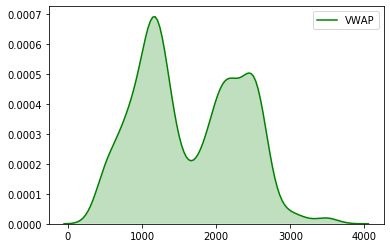

In [18]:
sns.kdeplot(data['VWAP'],shade=True, color='g')

### SubSetting

In [29]:
df_vwap = df[['Date', 'VWAP']]
df_vwap['Date']= df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,VWAP
Date,
2004-08-25,1008.32
2004-08-26,985.65
2004-08-27,969.94
2004-08-30,982.65
2004-08-31,982.18


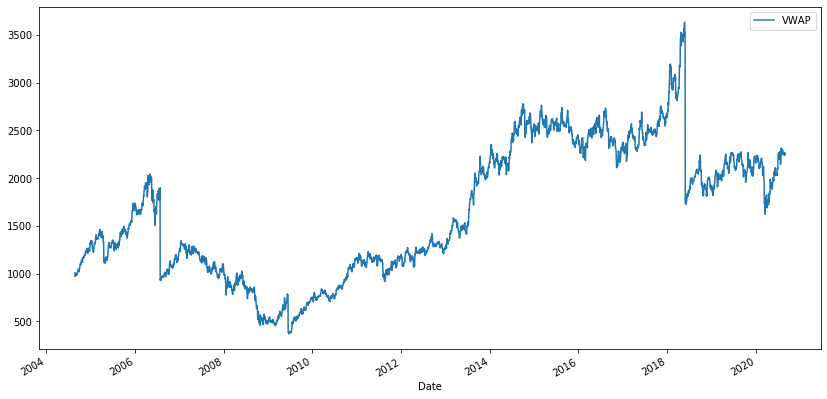

In [37]:
df_vwap.plot(figsize=(14, 7))

### Plotting each Month for the Year 2018 

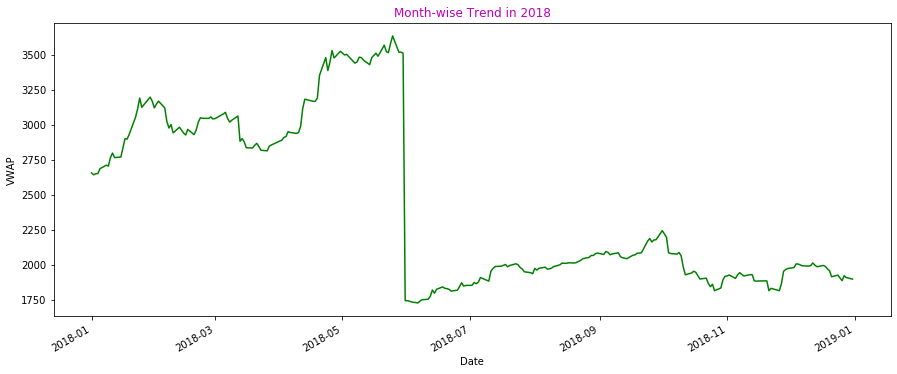

In [38]:
ax = df_vwap.loc['2018', 'VWAP'].plot(figsize=(15,6), color='g')
ax.set_title('Month-wise Trend in 2018', color='m' ); 
ax.set_ylabel('VWAP');


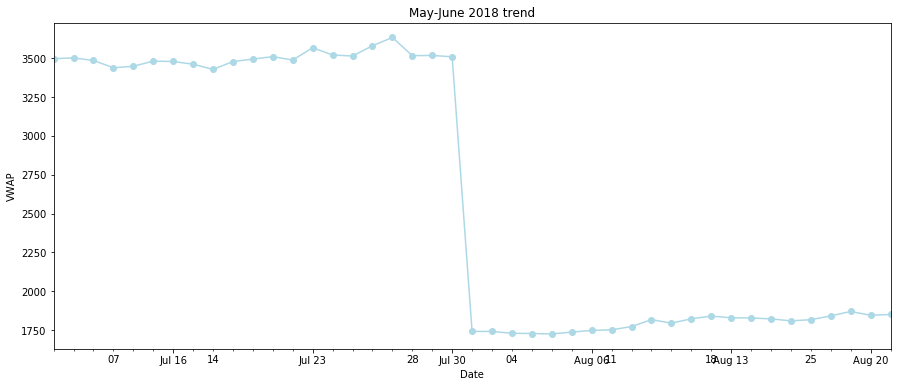

In [43]:
ax = df_vwap.loc['2018-05':'2018-06','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6), color='lightblue')
ax.set_title('May-June 2018 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### Month wise Trend Analysis of Year 2020

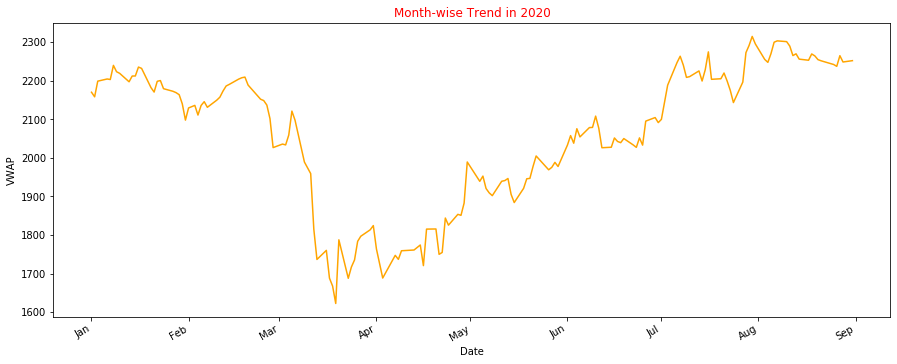

In [41]:
ax = df_vwap.loc['2020', 'VWAP'].plot(figsize=(15,6), color='orange')
ax.set_title('Month-wise Trend in 2020', color='r'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

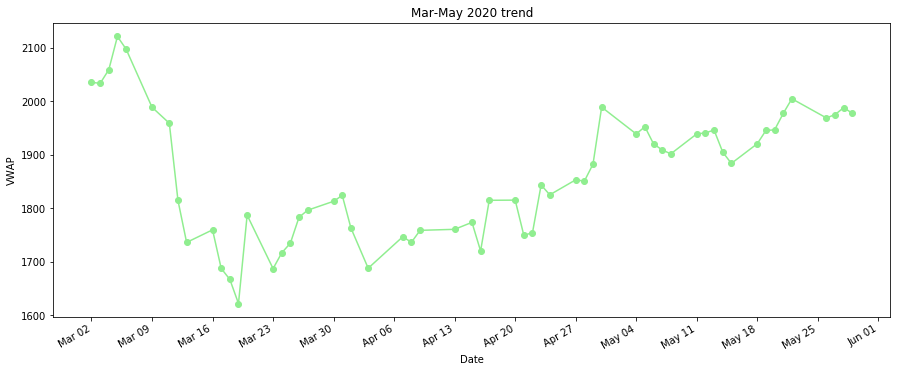

In [44]:
ax = df_vwap.loc['2020-03':'2020-05','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6), color='lightgreen')
ax.set_title('Mar-May 2020 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### Reset

In [45]:
df_vwap.reset_index(inplace=True)
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek
df_vwap['Weekday Name'] = df_vwap.Date.dt.day_name()


#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,
2004-08-25,1008.32,2004,8,25,2,Wednesday
2004-08-26,985.65,2004,8,26,3,Thursday
2004-08-27,969.94,2004,8,27,4,Friday
2004-08-30,982.65,2004,8,30,0,Monday
2004-08-31,982.18,2004,8,31,1,Tuesday


### Time Resampling

In [ ]:
we use a process called time resampling to aggregate data into a 
defined time period, such as by month or by quarter. Institutions can then see an overview of
stock prices and make decisions according to these trends.

The pandas library has
a resample() function which resamples such time series data. 
The resample method in pandas is similar to its groupby method as it 
is essentially grouping according to a certain time span.
The resample() function looks like this:

### Year End Resampling (A)

In [46]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2004-12-31,1138.188556,2004.0,10.377778,16.144444,2.044444
2005-12-31,1372.491195,2005.0,6.541833,15.733068,2.000000
2006-12-31,1475.749840,2006.0,6.552000,15.976000,2.056000
2007-12-31,1151.282209,2007.0,6.554217,15.843373,1.987952
2008-12-31,789.674024,2008.0,6.443089,15.821138,1.955285


Text(0.5, 1.0, 'Yearly Mean VWAP for TCS')

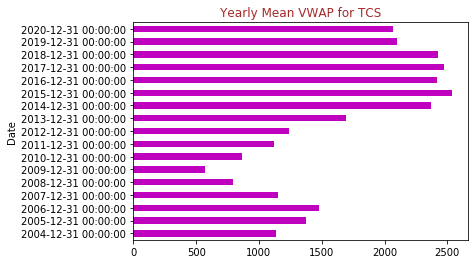

In [58]:
df_vwap['VWAP'].resample('A').mean().plot(kind='barh', color='m')
plt.title('Yearly Mean VWAP for TCS', color='brown')

### Weekly Frequency (W)

In [47]:
df_vwap.resample(rule = 'W').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2004-08-29,987.970,2004.0,8.0,26.0,3.0
2004-09-05,989.676,2004.0,8.6,13.4,2.0
2004-09-12,992.356,2004.0,9.0,8.0,2.0
2004-09-19,1012.058,2004.0,9.0,15.0,2.0
2004-09-26,1037.536,2004.0,9.0,22.0,2.0


### Monthly Frequency (M)

In [48]:
df_vwap.resample(rule = 'M').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2004-08-31,985.748000,2004.0,8.0,27.800000,2.000000
2004-09-30,1013.358636,2004.0,9.0,15.681818,2.045455
2004-10-31,1113.677500,2004.0,10.0,15.250000,2.150000
2004-11-30,1202.856500,2004.0,11.0,14.400000,1.850000
2004-12-31,1255.811304,2004.0,12.0,16.347826,2.130435


### Standard Deviation

In [49]:
df_vwap.resample(rule = 'M').std()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2004-08-31,13.979681,0.0,0.0,2.588436,1.581139
2004-09-30,18.731890,0.0,0.0,9.135938,1.396502
2004-10-31,30.387472,0.0,0.0,8.848877,1.598519
2004-11-30,28.224349,0.0,0.0,9.184655,1.386969
2004-12-31,32.356330,0.0,0.0,9.480164,1.423962


### Quarter Frequency (Q)

In [51]:
df_vwap.resample(rule ='Q').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2004-09-30,1008.245556,2004.0,8.814815,17.925926,2.037037
2004-12-31,1193.878413,2004.0,11.047619,15.380952,2.047619
2005-03-31,1356.078033,2005.0,2.049180,15.000000,1.901639
2005-06-30,1255.994308,2005.0,5.046154,15.646154,2.030769
2005-09-30,1350.006190,2005.0,8.015873,15.777778,2.047619


### Original Dataframe

In [60]:
df_vwap.head()

,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,
2004-08-25,1008.32,2004,8,25,2,Wednesday
2004-08-26,985.65,2004,8,26,3,Thursday
2004-08-27,969.94,2004,8,27,4,Friday
2004-08-30,982.65,2004,8,30,0,Monday
2004-08-31,982.18,2004,8,31,1,Tuesday


### Forward Shift 

In [61]:
df_vwap.shift(1).head()


,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,
2004-08-25,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-26,1008.32,2004.0,8.0,25.0,2.0,Wednesday
2004-08-27,985.65,2004.0,8.0,26.0,3.0,Thursday
2004-08-30,969.94,2004.0,8.0,27.0,4.0,Friday
2004-08-31,982.65,2004.0,8.0,30.0,0.0,Monday


### Backward Shift

In [62]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,
2004-08-25,985.65,2004.0,8.0,26.0,3.0,Thursday
2004-08-26,969.94,2004.0,8.0,27.0,4.0,Friday
2004-08-27,982.65,2004.0,8.0,30.0,0.0,Monday
2004-08-30,982.18,2004.0,8.0,31.0,1.0,Tuesday
2004-08-31,989.68,2004.0,9.0,1.0,2.0,Wednesday


## Rolling Window

In [63]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2004-08-25,NaN,NaN,NaN,NaN,NaN
2004-08-26,NaN,NaN,NaN,NaN,NaN
2004-08-27,NaN,NaN,NaN,NaN,NaN
2004-08-30,NaN,NaN,NaN,NaN,NaN
2004-08-31,NaN,NaN,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN,NaN,NaN
2004-09-02,987.911429,2004.0,8.285714,20.285714,2.142857
2004-09-03,986.281429,2004.0,8.428571,17.142857,2.428571
2004-09-06,988.170000,2004.0,8.571429,14.285714,2.000000


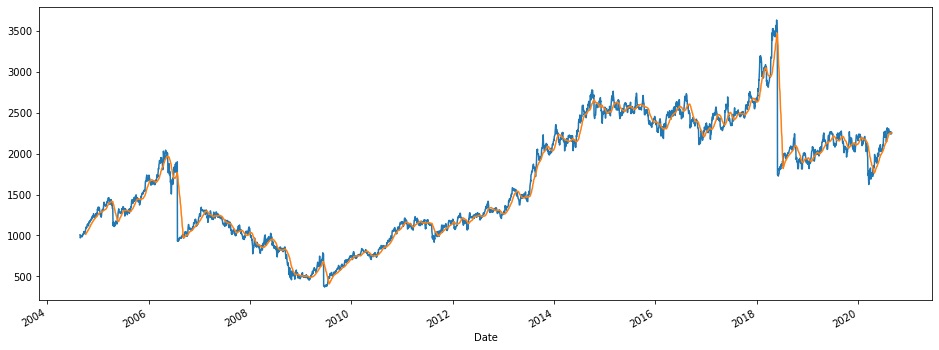

In [64]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))